<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Claudia Estefania Meza Fonseca y Cristina Lobera De la Mora
    
**Fecha:** 12 de octubre del 2021.

**Expediente** : if714997 y if729930.
**Profesor:** Oscar David Jaramillo Zuluaga.
    
# Tarea 5

> Para las siguiente dos funciones, genere muestres aleatorias que distribuyan según la función dada usando el método de la transformada inversa y grafique el histograma de 1000 muestras generadas con el método de la transformada inversa y compárela con el función $f(x)$ **(recuerde que $f(x)$ es la distribución de probabilidad y $F(x)$ es la distribución de probabilidad acumulada)** [ver este enlace para más información](https://es.wikipedia.org/wiki/Funci%C3%B3n_de_distribuci%C3%B3n). Este procedimiento se realiza con el fín de validar que el procedimiento y los resultados son correctos.
    
> 1. Generación variable aleatoria continua
>El tiempo en el cual un movimiento browniano se mantiene sobre su punto máximo en el intervalo [0,1] tiene una distribución
>$$F(x)=\frac{2}{\pi}\sin^{-1}(\sqrt x),\quad 0\leq x\leq 1$$ </font>

**Solución Cristina**

In [1]:
from scipy import optimize
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

<ipython-input-4-12c576a2925a>:6: RuntimeWarning: divide by zero encountered in true_divide
  y = 1/(np.pi*np.sqrt(x)*np.sqrt(1-x))


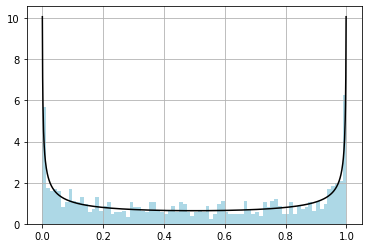

In [4]:
#Función de prob acumulada para generar los aleatorios
m = np.random.rand(1000)
fx = np.sin(np.pi / 2 * m)**2
#Derivamos para obtener f(x) y comprobamos que los puntos generados esten por debajo de la curva
x = np.arange(0.00, 1, 0.001)
y = 1/(np.pi*np.sqrt(x)*np.sqrt(1-x))
plt.plot(x, y, color = 'black')
plt.hist(fx, 80, density = True, color = 'lightblue')
plt.grid()
plt.show()

**Solución Estefania**

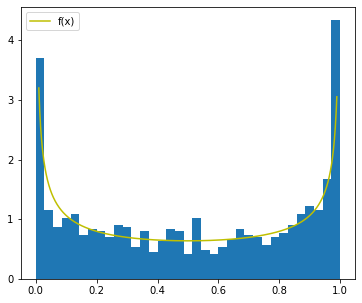

In [5]:
muestras = np.random.rand(1000)

funcion = np.sin(np.pi/2 * muestras)**2

x = np.arange(0.01,0.99,0.001)

f_x = 1/(np.pi*np.sqrt(x)*np.sqrt(1-x))

#graficar
plt.figure(figsize=(6,5))
plt.plot(x, f_x, color = 'y', label = 'f(x)')
plt.hist(funcion, 35, density = True,)
plt.legend()
plt.show()

> 2. Generación variable aleatoria Discreta
> La distribución binomial modela el número de éxitos de n ensayos independientes donde hay una probabilidad p de éxito en cada ensayo.
> Generar una variable aletoria binomial con parámetros $n=10$ y $p=0.7$. Recordar que $$X\sim binomial(n,p) \longrightarrow p_i=P(X=i)=\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i},\quad i=0,1,\cdots,n$$
> Por propiedades de la operación factorial la anterior $p_i$ se puede escribir como:
> $$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i $$

> **Nota:** Por notación recuerde que para el caso continuo $f(x)$ es la distribución de probabilidad (PDF), mientras $F(x)$ corresponde a la distribución de probabilidad acumulada (CDF). Para el caso discreto, $P(X=i)$ corresponde a su distribución de probabilidad (PMF) y $ F_{X}(x)=\operatorname {P} (X\leq x)=\sum _{x_{i}\leq x}\operatorname {P} (X=x_{i})=\sum _{x_{i}\leq x}p(x_{i})$, corresponde a su distribución de probabilidad acumulada (CDF).

**Solución Cristina**

In [12]:
def Gen_distr_discreta(p_acum: 'P.Acumulada de la distribución a generar',
                       indices: 'valores reales a generar aleatoriamente',
                       N: 'cantidad de números aleatorios a generar'):
    
    U =np.random.rand(N)
    rand2reales = {i: idx for i, idx in enumerate(indices)}
    y = pd.Series([sum([1 for p in p_acum if p < ui]) for ui in U]).map(rand2reales)

    return y


In [16]:
def plot_histogram_discrete(distribucion:'señal de varibles aleatorias de un distribución DISCRETA dada',
                            label:'label del legend a aparecer en el gráfica',
                            densidad:'por defecto regresa el histograma en densidad'=True):
    
    
    plt.figure(figsize=[6,4])
    y,x = np.histogram(distribucion,bins = len(set(distribucion)),density = densidad) 
    plt.bar(x[1:],y,label=label)
    plt.legend()
    plt.show()
    
def P_acum_binomial(n,p):
    Pr = np.zeros(n)
    Pr[0] = (1-p)**n
    def pr(i):
        nonlocal Pr
        c  = p/(1-p)
        Pr[i+1]=(c*(n-i)/(i+1))*Pr[i]

    [pr(i) for i in range(n-1)]
    return np.cumsum(Pr)

n = 10; p = 0.7; N = 10000
p_acum = P_acum_binomial(n,p)
u = np.random.rand(N)

d_binomial = Gen_distr_discreta(p_acum, np.arange(0, n+1), N)
d_bino_numpy = np.random.binomial(n,p,N)


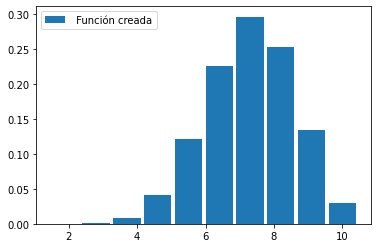

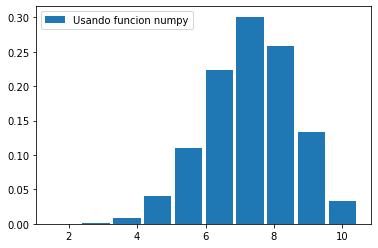

In [14]:
plot_histogram_discrete(d_binomial, ' Función creada')
plot_histogram_discrete(d_bino_numpy, 'Usando funcion numpy')

**Solución Estefania**

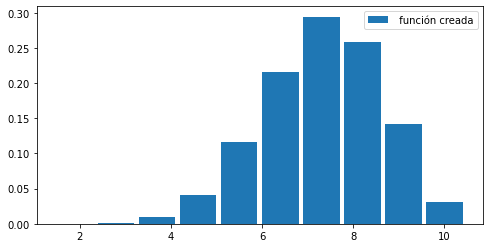

In [48]:
#distribución discreta
def Gen_distr_discreta(X:'vector de números random',
                       prob_ac: 'Probabilidad Acumulada de la distribución a generar'):
    v = np.array(list(map(lambda j:sum(1 for i in prob_ac if i<X[j]),range(N))))
    return v

def plot_histogram_discrete(distribucion:'Dist dada',
                            label:'label del legend ',
                            densidad:'histograma en densidad'=True):
    
    
    plt.figure(figsize=[8,4])
    y,x = np.histogram(distribucion,bins = len(set(distribucion)),density = densidad) 
    plt.bar(x[1:],y,label=label)
    plt.legend()
    plt.show()
    
def P_acum_binomial(n,p):
    Pr = np.zeros(n)
    Pr[0] = (1-p)**n
    def pr(i):
        nonlocal Pr
        c  = p/(1-p)
        Pr[i+1]=(c*(n-i)/(i+1))*Pr[i]
        
    # Lleno el vector Pr usando compresión de listas
    [pr(i) for i in range(n-1)]
    return np.cumsum(Pr)

# def(n,p,N):
n = 10; p = 0.7; N = 10000
p_acum = P_acum_binomial(n,p)
u = np.random.rand(N)

# Usando el método de la transformada inversa
dist_binomial = Gen_distr_discreta(u,p_acum)
plot_histogram_discrete(dist_binomial, ' función creada')
